# Import Library:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Setup Completed!')

Setup Completed!


# Import Data:

In [23]:
df = pd.read_csv('watches.csv')
df

,Unnamed: 0,titles,brand_names,images_links,prices,offers,Gender,Type
0,0,NP2576WM01 Analog Watch - For Women,Titan,https://rukminim1.flixcart.com/image/612/612/l...,"₹3,754",20% off,Women,Analog
1,1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,https://rukminim1.flixcart.com/image/612/612/l...,₹270,86% off,Unisex,none
2,2,77085PP03 Volt Analog Watch - For Men,SONATA,https://rukminim1.flixcart.com/image/612/612/l...,₹524,25% off,Men,Analog
3,3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,https://rukminim1.flixcart.com/image/612/612/k...,₹319,82% off,Unisex,Analog
4,4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,https://rukminim1.flixcart.com/image/612/612/k...,₹343,61% off,Unisex,none
...,...,...,...,...,...,...,...,...
970,970,LCS-1456 Day And Date Functioning High Quality...,Espoir,https://rukminim1.flixcart.com/image/612/612/j...,₹273,50% off,Unisex,Analog
971,971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,https://rukminim1.flixcart.com/image/612/612/l...,₹299,71% off,Unisex,none
972,972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,https://rukminim1.flixcart.com/image/612/612/k...,"₹6,997",85% off,Men,Analog
973,973,2229685 Analog Watch - For Men,Mast & Harbour,https://rukminim1.flixcart.com/image/612/612/j...,"₹1,129",15% off,Men,Analog


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    975 non-null    int64 
 1   titles        975 non-null    object
 2   brand_names   975 non-null    object
 3   images_links  975 non-null    object
 4   prices        975 non-null    object
 5   offers        975 non-null    object
 6   Gender        975 non-null    object
 7   Type          975 non-null    object
dtypes: int64(1), object(7)
memory usage: 61.1+ KB


# Data Cleaning:

In [25]:
df = df.drop(columns = 'Unnamed: 0')
df

,titles,brand_names,images_links,prices,offers,Gender,Type
0,NP2576WM01 Analog Watch - For Women,Titan,https://rukminim1.flixcart.com/image/612/612/l...,"₹3,754",20% off,Women,Analog
1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,https://rukminim1.flixcart.com/image/612/612/l...,₹270,86% off,Unisex,none
2,77085PP03 Volt Analog Watch - For Men,SONATA,https://rukminim1.flixcart.com/image/612/612/l...,₹524,25% off,Men,Analog
3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,https://rukminim1.flixcart.com/image/612/612/k...,₹319,82% off,Unisex,Analog
4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,https://rukminim1.flixcart.com/image/612/612/k...,₹343,61% off,Unisex,none
...,...,...,...,...,...,...,...
970,LCS-1456 Day And Date Functioning High Quality...,Espoir,https://rukminim1.flixcart.com/image/612/612/j...,₹273,50% off,Unisex,Analog
971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,https://rukminim1.flixcart.com/image/612/612/l...,₹299,71% off,Unisex,none
972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,https://rukminim1.flixcart.com/image/612/612/k...,"₹6,997",85% off,Men,Analog
973,2229685 Analog Watch - For Men,Mast & Harbour,https://rukminim1.flixcart.com/image/612/612/j...,"₹1,129",15% off,Men,Analog


In [26]:
df.duplicated().any()

True

In [27]:
df = df.drop_duplicates()

In [28]:
df.isnull().sum()

titles          0
brand_names     0
images_links    0
prices          0
offers          0
Gender          0
Type            0
dtype: int64

In [29]:
df['prices'] = df['prices'].str.replace('₹', '', regex = True)
df['prices'] = df['prices'].str.replace(',', '', regex = True)
df['offers'] = df['offers'].str.replace('% off','',regex = True)
df['prices'] = df['prices'].astype('int')
df['offers'] = df['offers'].astype('float')

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_46323/153452127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices'] = df['prices'].str.replace('₹', '', regex = True)
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_46323/153452127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prices'] = df['prices'].str.replace(',', '', regex = True)
/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_46323/153452127.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [31]:
df['discount prices'] = (df['prices']*(100 - df['offers']))/100
df

/var/folders/1m/yfx19hln2gscp05q7fx4x49m0000gn/T/ipykernel_46323/2379874339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount prices'] = (df['prices']*(100 - df['offers']))/100


,titles,brand_names,images_links,prices,offers,Gender,Type,discount prices
0,NP2576WM01 Analog Watch - For Women,Titan,https://rukminim1.flixcart.com/image/612/612/l...,3754,20.0,Women,Analog,3003.20
1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,https://rukminim1.flixcart.com/image/612/612/l...,270,86.0,Unisex,none,37.80
2,77085PP03 Volt Analog Watch - For Men,SONATA,https://rukminim1.flixcart.com/image/612/612/l...,524,25.0,Men,Analog,393.00
3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,https://rukminim1.flixcart.com/image/612/612/k...,319,82.0,Unisex,Analog,57.42
4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,https://rukminim1.flixcart.com/image/612/612/k...,343,61.0,Unisex,none,133.77
...,...,...,...,...,...,...,...,...
970,LCS-1456 Day And Date Functioning High Quality...,Espoir,https://rukminim1.flixcart.com/image/612/612/j...,273,50.0,Unisex,Analog,136.50
971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,https://rukminim1.flixcart.com/image/612/612/l...,299,71.0,Unisex,none,86.71
972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,https://rukminim1.flixcart.com/image/612/612/k...,6997,85.0,Men,Analog,1049.55
973,2229685 Analog Watch - For Men,Mast & Harbour,https://rukminim1.flixcart.com/image/612/612/j...,1129,15.0,Men,Analog,959.65


In [32]:
df = df.drop(columns = 'images_links')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 974
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   titles           805 non-null    object 
 1   brand_names      805 non-null    object 
 2   prices           805 non-null    int64  
 3   offers           805 non-null    float64
 4   Gender           805 non-null    object 
 5   Type             805 non-null    object 
 6   discount prices  805 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 50.3+ KB


In [34]:
df

,titles,brand_names,prices,offers,Gender,Type,discount prices
0,NP2576WM01 Analog Watch - For Women,Titan,3754,20.0,Women,Analog,3003.20
1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,270,86.0,Unisex,none,37.80
2,77085PP03 Volt Analog Watch - For Men,SONATA,524,25.0,Men,Analog,393.00
3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,319,82.0,Unisex,Analog,57.42
4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,343,61.0,Unisex,none,133.77
...,...,...,...,...,...,...,...
970,LCS-1456 Day And Date Functioning High Quality...,Espoir,273,50.0,Unisex,Analog,136.50
971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,299,71.0,Unisex,none,86.71
972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,6997,85.0,Men,Analog,1049.55
973,2229685 Analog Watch - For Men,Mast & Harbour,1129,15.0,Men,Analog,959.65


In [35]:
df['brand_names'].unique()

array(['Titan', 'Piaoma', 'SONATA', 'LOIS CARON', 'Rizzly', 'WHITE STONE',
       'hala', 'Fastrack', 'VAN HEUSEN', 'HYMT', 'CASADO', 'ANALOGUE',
       'HINISH', 'HMTr', 'Espoir', 'Blue Pearl', 'casera', 'SKMEI',
       'FOGG', 'LIMESTONE', 'TIMEX', 'Daniel Jubile', 'XN XEEZOS', 'Trex',
       'MAAN INTERNATIONAL', 'EDDY HAGER', 'MIKADO', 'Flozio', 'TIMEWEAR',
       'AMINO', 'ABREXO', 'PIRASO', 'hrnt', 'PETER ENGLAND', 'RUSTET',
       'DKERAOD', 'Altedo', 'Septem', 'ReniSales', 'Shocknshop',
       'Praizy Times', 'Spiky', 'MATRIX', 'KIARVI GALLERY',
       'Happy Khajana', 'TYMU', 'LORENZ', 'FOSSIL', 'WROGN', 'ARMADO',
       'Loretta', 'MIVAAN', 'SPINOZA', 'Jainx', 'Praizy', 'hmte', 'HATin',
       'just like', 'MAXIMA', 'YOUTH CLUB', 'SWISSTONE', 'Allen Solly',
       'SWADESI STUFF', 'Shivark', 'FOXTER', 'Jaxer', 'Styleflix', 'CRAB',
       'CASIO', 'TrackFly', 'KNACK', 'Kolpsy', 'Timor', 'FORVI',
       'Varni Fashion', 'HEMT', 'A/X ARMANI EXCHANGE', 'Benling',
       'Diaggro'

# Data Analysis:

## Prices via Brands:

In [41]:
brand_price = df.groupby('brand_names')['discount prices'].mean().sort_values(ascending = False).head(10)
brand_price

brand_names
LACOSTE                8866.587500
TOMMY HILFIGER         4114.040000
MVMT                   3250.080000
A/X ARMANI EXCHANGE    2924.375000
FOSSIL                 2612.406429
CASIO                  2079.468750
Titan                  1937.070946
Allen Solly            1182.646250
Fastrack               1027.800948
MAXIMA                  984.100000
Name: discount prices, dtype: float64

In [42]:
df_brand_price = brand_price.to_frame('prices').rename_axis('brands').reset_index()
df_brand_price 

,brands,prices
0,LACOSTE,8866.587500
1,TOMMY HILFIGER,4114.040000
2,MVMT,3250.080000
3,A/X ARMANI EXCHANGE,2924.375000
4,FOSSIL,2612.406429
5,CASIO,2079.468750
6,Titan,1937.070946
7,Allen Solly,1182.646250
8,Fastrack,1027.800948
9,MAXIMA,984.100000


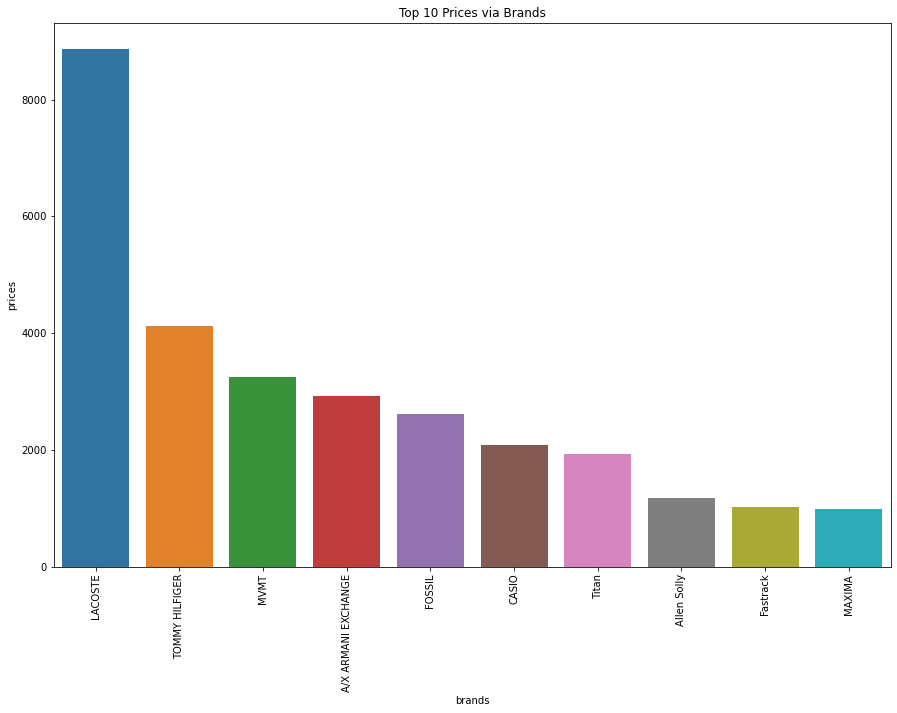

In [43]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x = df_brand_price['brands'], y = df_brand_price['prices'])
plt.xticks(rotation = 90)
plt.title('Top 10 Prices via Brands')
plt.show();

## Quantity, Gender via Brands:

In [45]:
df_brand_gen = df[['titles','brand_names','Gender']]
df_brand_gen

,titles,brand_names,Gender
0,NP2576WM01 Analog Watch - For Women,Titan,Women
1,PWRM-King Day And Date Functioning High Qualit...,Piaoma,Unisex
2,77085PP03 Volt Analog Watch - For Men,SONATA,Men
3,LCS-8188 TRENDING DAY & DATE FUNCTIONING Analo...,LOIS CARON,Unisex
4,Gents Exclusive 3 Designer Combo (Casual+Party...,Rizzly,Unisex
...,...,...,...
970,LCS-1456 Day And Date Functioning High Quality...,Espoir,Unisex
971,ORIGINAL Fancy Present All Diamond Black Silve...,DKERAOD,Unisex
972,AX2155 Hampton Analog Watch - For Men,A/X ARMANI EXCHANGE,Men
973,2229685 Analog Watch - For Men,Mast & Harbour,Men


In [52]:
brand_count = df_brand_gen.groupby('brand_names').count()['titles'].sort_values(ascending = False).head(10)
brand_count

brand_names
Fastrack      116
SONATA         93
Titan          74
TIMEX          31
Septem         17
LIMESTONE      17
VAN HEUSEN     16
CASIO          16
FOGG           16
Espoir         16
Name: titles, dtype: int64

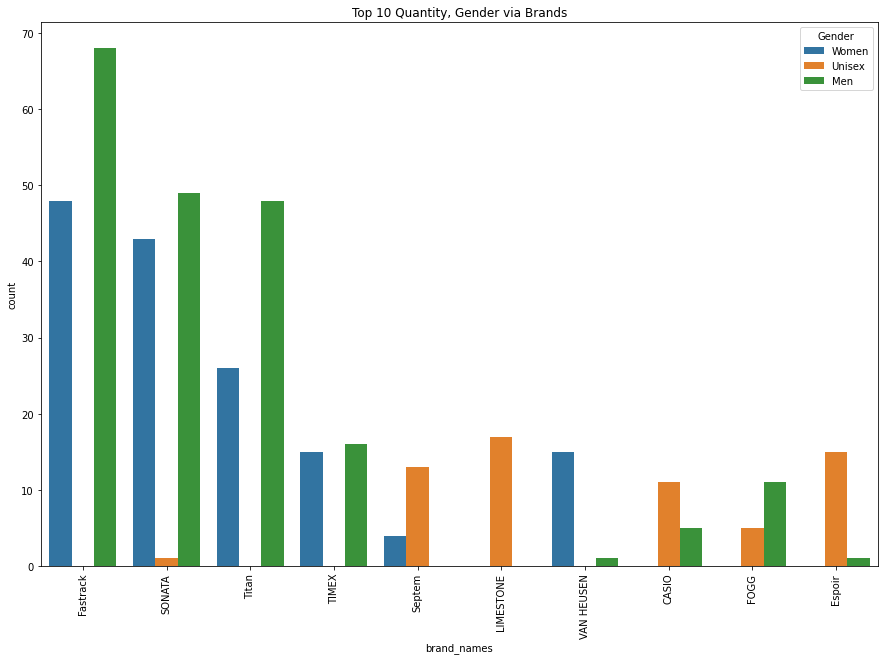

In [56]:
plt.figure(figsize = (15,10))
ax = sns.countplot(x = df_brand_gen['brand_names'], order = brand_count.index, hue = df_brand_gen['Gender'])
plt.xticks(rotation = 90)
plt.title('Top 10 Quantity, Gender via Brands')
plt.show();

## Titles, Gender and Prices:

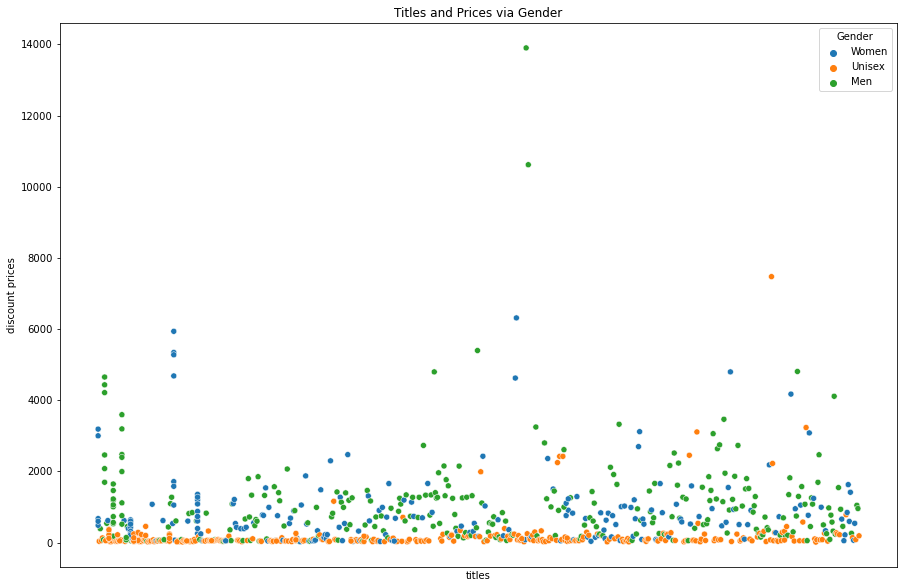

In [61]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x = df['titles'], y = df['discount prices'], hue = df['Gender'])
plt.xticks(rotation = 90)
ax.set_xticks([])
plt.title('Titles and Prices via Gender')
plt.show();

# SIUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU !!!!